In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import joblib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr, rankdata
from scipy.spatial.distance import squareform

save = False
figure_path = '/Users/lynnsorensen/surfdrive/SpatialAttention_sDCNN_2020/SpatialAttention_asn/Figures/'
result_path = '/Users/lynnsorensen/surfdrive/SpatialAttention_sDCNN_2020/ModelAnalysis/'

tracker = joblib.load(result_path + 'RDMs_110620.pkl')


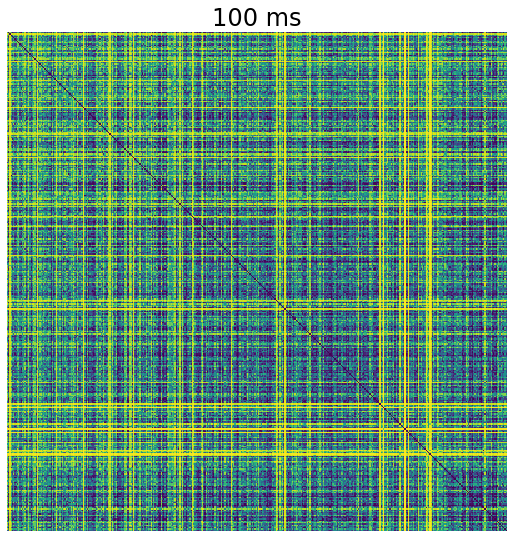

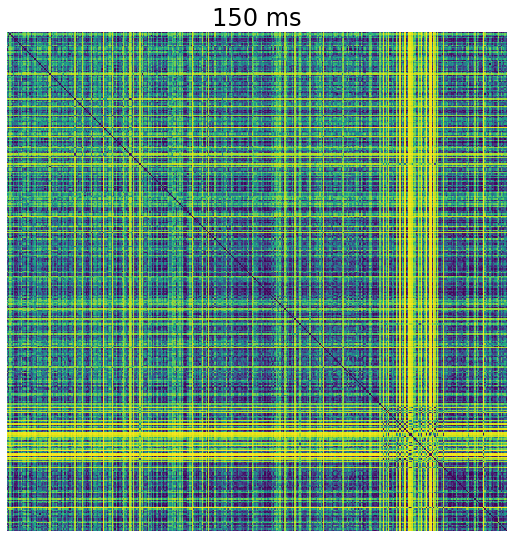

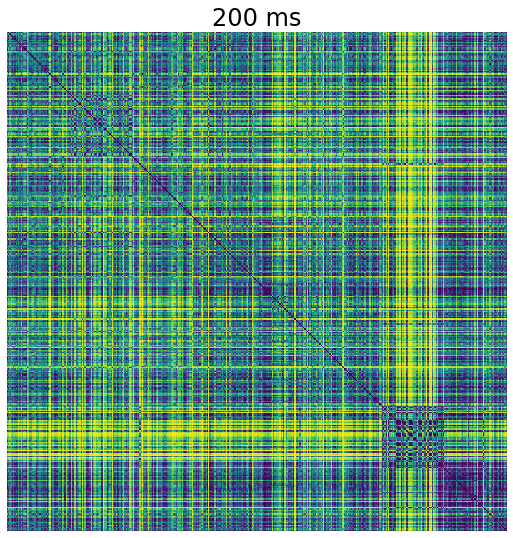

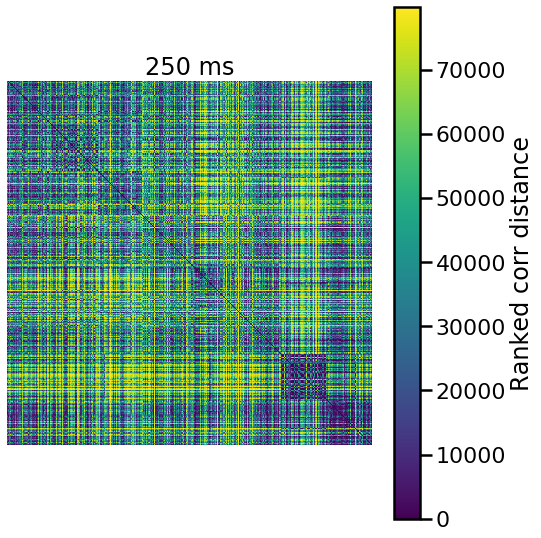

In [2]:
cond = 'neutral'
onset = 100
time_steps = 750
times = np.arange(200,400,50)
sns.set_context("poster")

for t in times:
    fig, ax = plt.subplots(figsize=(8,8))

    im =ax.imshow(squareform(rankdata(tracker['RDMs'][cond]['corr'][t,:])))
    ax.set_axis_off()
    ax.set_title(str(t - onset) + ' ms')
    if t == times[-1]:
        cb = plt.colorbar(im)
        cb.set_label("Ranked corr distance")
    plt.tight_layout()
    if save == True:
        fig.savefig(figure_path + 'RDM-' + str(t) + '.eps')
    else:
        fig.show()

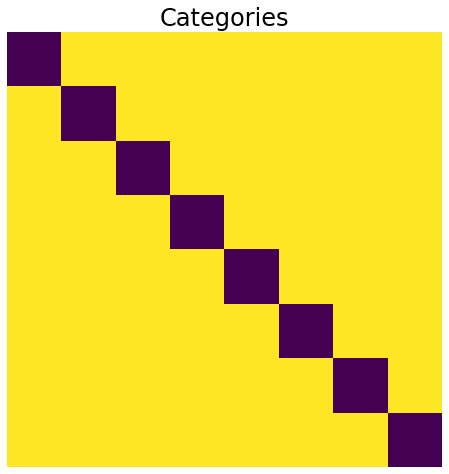

In [3]:
num_img = 50
cat_rdm = np.ones((num_img *8 ,num_img *8))
for cat in range(8):
    cat_rdm[cat * num_img: (cat+1) * num_img, cat * num_img: (cat+1) * num_img] = 0

fig, ax = plt.subplots(figsize=(8,8))

im = ax.imshow(cat_rdm)
ax.set_axis_off()
ax.set_title('Categories')
if save == True:
    fig.savefig(figure_path + 'RDM-category.eps')
else:
    fig.show()


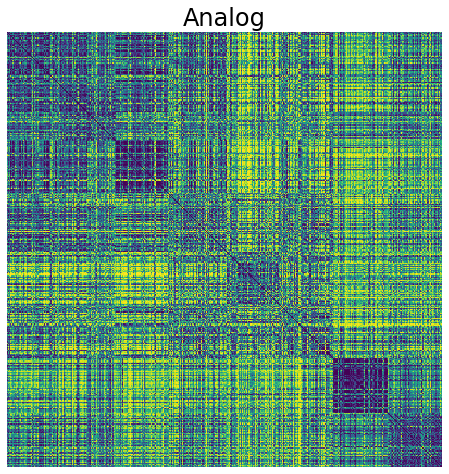

In [4]:

fig, ax = plt.subplots(figsize=(8,8))
im =ax.imshow(squareform(rankdata(tracker['RDMs']['analog']['corr'])))
ax.set_axis_off()
ax.set_title('Analog')
if save == True:
    fig.savefig(figure_path + 'RDM-analog.pdf')
else:
    fig.show()